In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

titles = {"AGP_AGE": "Age (AGP)", "AGP_BMI": "BMI (AGP)", "IBD200_CDAI": "CDAI (IBD200)"}

In [2]:
def plot(data):
    nll = []
    for seed in range(10):
        with open(f"../results/{data}/result_GP_MK_{seed}.json") as f:
            d = json.load(f)
        nll.append(d["test_nll"])

    selected_index = np.argmin(np.abs(np.array(nll) - np.mean(nll)))
    with open(f"../results/{data}/result_GP_MK_{selected_index}.json") as f:
        d = json.load(f)

    test_y = d["test_y_true"]
    output_mean = d["test_y_pred"]
    output_variance = d["test_y_variance"]
    nll = d["test_nll"]
    rmse = d["test_rmse"]

    plt.figure(figsize = (4, 6))
    plt.scatter(test_y, output_mean, c = np.sqrt(output_variance), cmap = "Blues_r", s = 10, zorder = 3)
    plt.plot(test_y, test_y, color = "black", alpha = 0.5, linewidth = 0.8, zorder = 2)
    plt.gca().set_aspect("equal", adjustable = "box")
    plt.grid(zorder = 1)
    plt.colorbar(location = "bottom").set_label("Predicted standard deviation", fontsize = "large")
    plt.gcf().axes[-1].spines["outline"].set_visible(False)
    plt.text(0.95, 0.05, f"NLL: {nll:.2f}\nRMSE: {rmse:.2f}", fontsize = 10, bbox = dict(fc = "white", ec = "white", alpha = 0.5),
             transform = plt.gca().transAxes, horizontalalignment = "right")
    plt.xlabel("Actual", fontsize = "x-large")
    plt.ylabel("Predicted", fontsize = "x-large")
    plt.title(titles[data], fontsize = "x-large")
    plt.tight_layout()
    plt.savefig(f"../figures/{data}_GP_MK_scatter_plot.pdf", bbox_inches = "tight")
    plt.show()

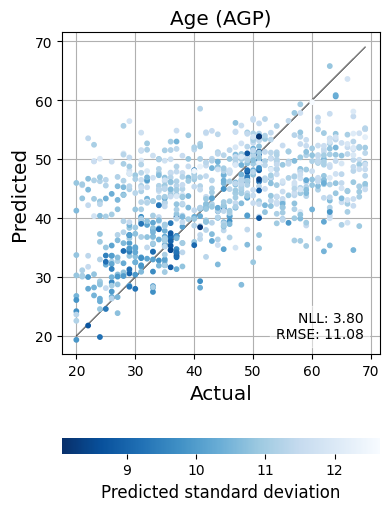

In [3]:
plot("AGP_AGE")

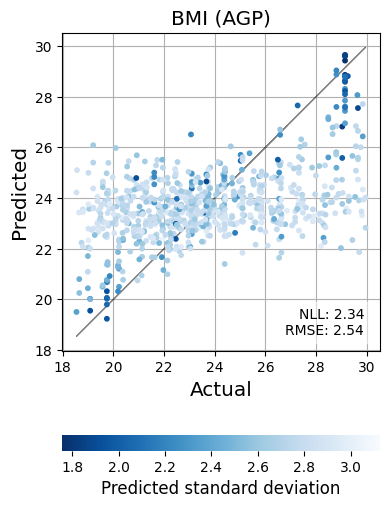

In [4]:
plot("AGP_BMI")

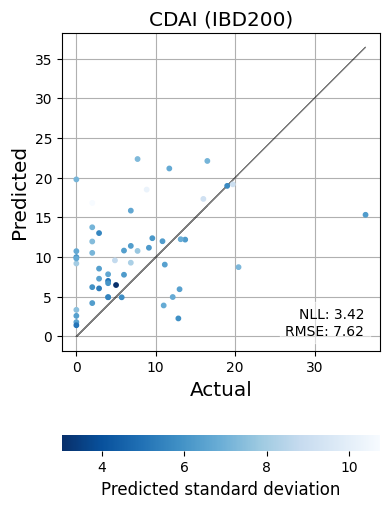

In [5]:
plot("IBD200_CDAI")